#### **CSC487 - Advanced Data Mining - HW4**
*Cameron Bentz*

[Colab Link](https://colab.research.google.com/drive/1E3tph05hhREfMCWqNGxb88WKlNzrmZ48?usp=sharing)

##### **Question 1**

| department |  age  | salary  | status | count |
| ---------- | ----- | ------- | ------ | ----- |
| sales      | 31_35 | 46K_50K | senior | 30    |
| sales      | 26_30 | 26K_30K | junior | 40    |
| systems    | 21_25 | 46K_50K | junior | 20    |
| systems    | 31_35 | 66K_70K | senior | 5     |
| systems    | 26_30 | 46K_50K | junior | 3     |
| systems    | 41_45 | 66K_70K | senior | 3     |
| marketing  | 36_40 | 46K_50K | senior | 10    |
| marketing  | 31_35 | 41K_45K | junior | 4     |
| secretary  | 46_50 | 36K_40K | senior | 4     |
| secretary  | 26_30 | 26K_30K | junior | 6     |

Given a data tuple having the values "Systems", "26_30", and "46K_50K" for the attributes department, age, and salary, respectively, what would a native Bayesian classification of the status according to the data above? Notice that *Count* column is **NOT** an attribute. It just tells how many times a row occurs in our database and *status* is our target variable.

**Tuple**
- **department**: systems
- **age**: 26_30
- **salary**: 46K_50K

Classify **status** as either `junior` or `senior`.

Formula: $P(A \mid B) = \frac{P(B \mid A) \cdot P(A)}{P(B)}$

#### Step 1: Get the prior probabilities

- **total count:**
30 + 40 + 40 + 20 + 5 + 3 + 3 + 10 + 4 + 4 + 6 = 165

- **P(junior):**
(40 + 40 + 20 + 3 + 4 + 6) / 165 = $\frac {113} {165}$

- **P(senior):**
(30 + 5 + 3 + 10 + 4) / 165 = $\frac {52} {165}$

#### Step 2: Calculate likelihoods

##### department = systems

- P(department=systems | junior) = $\frac {20 + 3} {123}$ = $\frac {23} {123}$

- P(department=systems | senior) = $\frac {5 + 3} {52}$ = $\frac {8} {52}$

##### age = 26_30

- P(age=26_30 | junior) = $\frac {40 + 3 + 6} {113}$ = $\frac {49} {113}$

- P(age=26_30 | senior) = $\frac {0} {52}$ = 0

##### salary = 46K_50K

- P(salary=46K_50K | junior) = $\frac {20} {113}$

- P(age=26_30 | junior) = $\frac {30 + 10} {52}$ = $\frac {40} {52}$

#### Step 3: Bayes calculation

- **P(junior | tuple)**

$(\frac {113} {165}) \cdot (\frac {23} {113}) \cdot (\frac {49} {113}) \cdot (\frac {20} {113})$

- **P(senior | tuple)**

$(\frac {52} {165}) \cdot (\frac {8} {52}) \cdot 0 \cdot (\frac {40} {52})$ = `0`

The senior class has a zero probability because there are no seniors with age '26__30'.

#### Therefore: The predicted class is `junior`

##### **Question 2**

Split your diabetes data into two parts for training and testing purposes. Namely, reserve last 10 rows of the diabetes_train.csv for the test set. Then fit a SVM classifier on the bigger portion of thie data and test it on these 10 rows you had reserved. Please feel free to modify existing codes. Notice that you're not going to read diabetes_test.csv anymore since you're going to split the bigger data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

##### Data manipulation

In [3]:
diabetes = pd.read_csv('/content/drive/MyDrive/DATA/diabetes_train.csv')

# remove class
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

# split data
X_train, X_test = X.iloc[:-10], X.iloc[-10:]
y_train, y_test = y.iloc[:-10], y.iloc[-10:]

##### SVM

In [22]:
# used lab 8 as guide, tested kernels, C, gamma values until highest accuracy, spent way too much time here

C=[0.1, 10, 100]
gamma = [0.0001, 0.01, 0.1]
kernel = ['rbf', 'sigmoid']
# poly takes too long, linear outside of loop

best_accuracy = 0
best_params = {}

for k in kernel:
  for c in C:
    for g in gamma:
      clf = svm.SVC(C=c, gamma=g, kernel=k, probability=True)
      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)

      accuracy = accuracy_score(y_test, y_pred)
      if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {'C': c, 'gamma': g, 'kernel': k}
        best_model = clf

      print(f"Kernel: {k}, C: {c}, Gamma: {g}, Accuracy: {accuracy:.4f}")

# test linear separately, high C values take ages
linear_clf = svm.SVC(kernel='linear', probability=True)
linear_clf.fit(X_train, y_train)
linear_y_pred = linear_clf.predict(X_test)

# accuracy check outside loop
linear_accuracy = accuracy_score(y_test, linear_y_pred)
if linear_accuracy > best_accuracy:
  best_model = linear_clf
  best_accuracy = linear_accuracy
  best_params = {'C': 'default', 'gamma': 'scale', 'kernel': 'linear'}

print(f"Kernel: linear, C: 1, Gamma: scale, Accuracy: {linear_accuracy:.4f}")

# output final results
print(f"\nBest Parameters: {best_params}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print("\nPredictions:", best_model.predict(X_test).tolist())
print("Actual:", y_test.tolist())

Kernel: rbf, C: 0.1, Gamma: 0.0001, Accuracy: 0.7000
Kernel: rbf, C: 0.1, Gamma: 0.01, Accuracy: 0.3000
Kernel: rbf, C: 0.1, Gamma: 0.1, Accuracy: 0.3000
Kernel: rbf, C: 10, Gamma: 0.0001, Accuracy: 0.7000
Kernel: rbf, C: 10, Gamma: 0.01, Accuracy: 0.6000
Kernel: rbf, C: 10, Gamma: 0.1, Accuracy: 0.3000
Kernel: rbf, C: 100, Gamma: 0.0001, Accuracy: 0.6000
Kernel: rbf, C: 100, Gamma: 0.01, Accuracy: 0.6000
Kernel: rbf, C: 100, Gamma: 0.1, Accuracy: 0.3000
Kernel: sigmoid, C: 0.1, Gamma: 0.0001, Accuracy: 0.3000
Kernel: sigmoid, C: 0.1, Gamma: 0.01, Accuracy: 0.3000
Kernel: sigmoid, C: 0.1, Gamma: 0.1, Accuracy: 0.3000
Kernel: sigmoid, C: 10, Gamma: 0.0001, Accuracy: 0.2000
Kernel: sigmoid, C: 10, Gamma: 0.01, Accuracy: 0.3000
Kernel: sigmoid, C: 10, Gamma: 0.1, Accuracy: 0.3000
Kernel: sigmoid, C: 100, Gamma: 0.0001, Accuracy: 0.2000
Kernel: sigmoid, C: 100, Gamma: 0.01, Accuracy: 0.3000
Kernel: sigmoid, C: 100, Gamma: 0.1, Accuracy: 0.3000
Kernel: linear, C: 1, Gamma: scale, Accuracy: 

#### Question 4

Please use the data shown for questions below.

|   | x1 | x2 |      
| - | -- | -- |
| a | 2  | 10 |
| b | 2  | 5  |
| c | 8  | 4  |
| d | 5  | 8  |
| e | 7  | 5  |
| f | 6  | 4  |
| g | 1  | 2  |
| h | 4  | 9  |

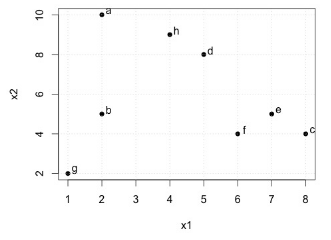

##### (a) If *h* and *c* are selected as the initial centers for your *k*-means clustering, assign memberships for other points, and compute the means (centroids) of your initial clusters. You can use Manhattan distance.


##### Create dataframe

In [25]:
points = {
    'a': [2, 10],
    'b': [2, 5],
    'c': [8, 4],
    'd': [5, 8],
    'e': [7, 5],
    'f': [6, 4],
    'g': [1, 2],
    'h': [4, 9]
}
df = pd.DataFrame(points).T
df.columns = ['x1', 'x2']

Initial Assignment:
Cluster 1: ['a', 'b', 'd', 'h']
Cluster 2: ['c', 'e', 'f', 'g']

New Centroids:
Cluster 1 Centroid: [3.25 8.  ]
Cluster 2 Centroid: [5.5  3.75]


##### Initial clusters

In [28]:
# initial cluster centers: h and c
centroid_1 = df.loc['h'].values  # [4, 9]
centroid_2 = df.loc['c'].values  # [8, 4]

# manhattan distance function
def manhattan(p1, p2):
    return np.sum(np.abs(p1 - p2))

# assign points
def assign_clusters(df, cent1, cent2):
    clusters = {'Cluster 1': [], 'Cluster 2': []}
    for label, coords in df.iterrows():
        dist1 = manhattan(coords.values, cent1)
        dist2 = manhattan(coords.values, cent2)
        if dist1 <= dist2:
            clusters['Cluster 1'].append(label)
        else:
            clusters['Cluster 2'].append(label)
    return clusters

# first assignment
clusters = assign_clusters(df, centroid_1, centroid_2)

##### Compute new centroids

In [29]:
def compute_centroid(df, cluster):
    return df.loc[cluster].mean().values

new_centroid_1 = compute_centroid(df, clusters['Cluster 1'])
new_centroid_2 = compute_centroid(df, clusters['Cluster 2'])

# Output
print("Initial Assignment:")
print("Cluster 1:", clusters['Cluster 1'])
print("Cluster 2:", clusters['Cluster 2'])
print("\nNew Centroids:")
print("Cluster 1 Centroid:", new_centroid_1)
print("Cluster 2 Centroid:", new_centroid_2)

Initial Assignment:
Cluster 1: ['a', 'b', 'd', 'h']
Cluster 2: ['c', 'e', 'f', 'g']

New Centroids:
Cluster 1 Centroid: [3.25 8.  ]
Cluster 2 Centroid: [5.5  3.75]


##### (b) Based on the centroids you found above reassign the memberships by using Manhattan distance

In [31]:
# assign points using updated centroids
reassigned_clusters = assign_clusters(df, new_centroid_1, new_centroid_2)

# output final clusters
print("Reassigned Clusters based on new centroids:")
print("Cluster 1:", reassigned_clusters['Cluster 1'])
print("Cluster 2:", reassigned_clusters['Cluster 2'])

Reassigned Clusters based on new centroids:
Cluster 1: ['a', 'b', 'd', 'h']
Cluster 2: ['c', 'e', 'f', 'g']


#### Question 4
Given the distance matrix below answer the following questions. Notice that this is a distance matrix, meaning the
distance between any pair of points can be found by checking the corresponding cell them.

|   | a | b | c | d | e | f | g |
|---|---|---|---|---|---|---|---|
| b | 5 |   |   |   |   |   |   |
| c | 8 | 6 |   |   |   |   |   |
| d | 4 | 4 | 5 |   |   |   |   |
| e | 7 | 5 | 1 | 4 |   |   |   |
| f | 7 | 4 | 2 | 4 | 1 |   |   |
| g | 8 | 3 | 7 | 7 | 7 | 5 |   |
| h | 2 | 4 | 6 | 1 | 5 | 5 | 8 |

#### (a) Perform hierarchical clustering using single link measure for the above and draw the final dendrogram.

##### New imports

In [32]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

In [34]:
# List of point labels
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']

# condensed distance matrix scipy requirement (upper triangle, row-wise)
distances = [
    5,
    8, 6,
    4, 4, 5,
    7, 5, 1, 4,
    7, 4, 2, 4, 1,
    8, 3, 7, 7, 7, 5,
    2, 4, 6, 1, 5, 5, 8
]

# hierarchical clustering with single-link
sl_cluster = linkage(distances, method='single')

##### Plot the dendogram

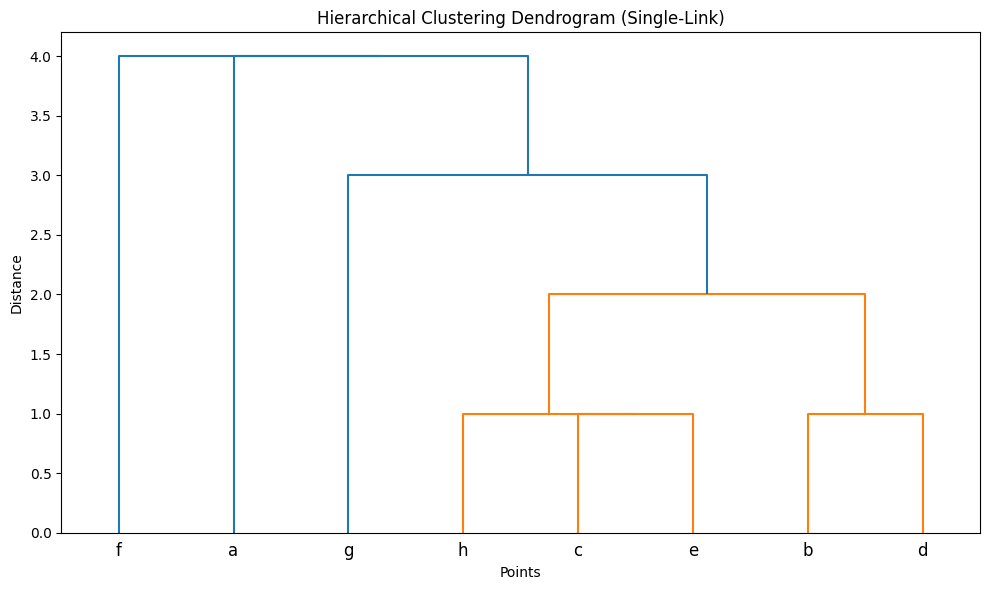

In [37]:
plt.figure(figsize=(10, 6))
dendrogram(sl_cluster, labels=labels)
plt.title("Hierarchical Clustering Dendrogram (Single-Link)")
plt.xlabel("Points")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

#### (b) Determine whether a point is core based on ***ε = 6*** and ***minPts = 2***. (Recall that a point p is a core point if at least ***minPts*** points are within distance ε of it (including p).)


### Core Point Evaluation (ε = 6, minPts = 2)

| Point | Neighbors within ε = 6                    | # Points ≤ 6 | Core? |
|-------|-------------------------------------------|--------------|-------|
| **a** | b (5), d (4), h (2)                       | 3            |  Yes  |
| **b** | a (5), d (4), e (5), f (4), g (3), h (4)  | 6            |  Yes  |
| **c** | b (6), e (1), f (2), h (6)                | 4            |  Yes  |
| **d** | a (4), b (4), e (4), f (4), h (1)         | 5            |  Yes  |
| **e** | b (5), c (1), d (4), f (1), h (5)         | 5            |  Yes  |
| **f** | b (4), c (2), d (4), e (1), g (5), h (5)  | 6            |  Yes  |
| **g** | b (3), f (5)                              | 2            |  Yes  |
| **h** | a (2), b (4), c (6), d (1), e (5), f (5)  | 6            |  Yes  |
